In [150]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')

In [151]:
df = pd.read_csv("fifa_cleaned.csv")

In [152]:
df

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,204322,R. McKenzie,Rory McKenzie,1993-10-07,25,175.26,74.8,"RM,CAM,CM",Scotland,67,...,53+2,52+2,52+2,52+2,53+2,50+2,46+2,46+2,46+2,50+2
17950,239762,M. Sipľak,Michal Sipľak,1996-02-02,23,182.88,79.8,LB,Slovakia,59,...,57+2,55+2,55+2,55+2,57+2,57+2,58+2,58+2,58+2,57+2
17951,235155,J. Bekkema,Jan Bekkema,1996-04-09,22,185.42,89.8,GK,Netherlands,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17952,244883,A. Al Yami,Abdulrahman Al Yami,1997-06-19,21,175.26,64.9,"ST,LM",Saudi Arabia,59,...,41+2,35+2,35+2,35+2,41+2,39+2,32+2,32+2,32+2,39+2


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In [154]:
df.columns

Index(['id', 'name', 'full_name', 'birth_date', 'age', 'height_cm',
       'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'work_rate', 'body_type', 'release_clause_euro', 'club_team',
       'club_rating', 'club_position', 'club_jersey_number', 'club_join_date',
       'contract_end_year', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
  

# Removing Columns which are not useful by observing data and duplicate columns¶

like birth_date and age = so removing birth_date

In [155]:
columns_to_remove = ["club_jersey_number", "id", "name", "birth_date","national_jersey_number"]
df = df.drop(columns=columns_to_remove)

In [156]:
df

,full_name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,Lionel Andrés Messi Cuccittini,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,Christian Dannemann Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,Paul Pogba,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,Lorenzo Insigne,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,Kalidou Koulibaly,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,Rory McKenzie,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,975000.0,3000.0,...,53+2,52+2,52+2,52+2,53+2,50+2,46+2,46+2,46+2,50+2
17950,Michal Sipľak,23,182.88,79.8,LB,Slovakia,59,67,190000.0,1000.0,...,57+2,55+2,55+2,55+2,57+2,57+2,58+2,58+2,58+2,57+2
17951,Jan Bekkema,22,185.42,89.8,GK,Netherlands,59,67,170000.0,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17952,Abdulrahman Al Yami,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,280000.0,4000.0,...,41+2,35+2,35+2,35+2,41+2,39+2,32+2,32+2,32+2,39+2


In [157]:
numerical_columns = df.select_dtypes(include=['float', 'int'])
numerical_columns

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,31,170.18,72.1,94,94,110500000.0,565000.0,5,4,4,...,75,96,33,28,26,6,11,15,14,8
1,27,154.94,76.2,88,89,69500000.0,205000.0,3,5,4,...,67,88,59,57,22,9,14,7,7,6
2,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,5,...,82,87,63,67,67,5,6,2,4,3
3,27,162.56,59.0,88,88,62000000.0,165000.0,3,4,4,...,61,83,51,24,22,8,4,14,9,10
4,27,187.96,88.9,88,91,60000000.0,135000.0,3,3,2,...,33,80,91,88,87,7,11,7,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,67,70,975000.0,3000.0,1,3,3,...,63,56,40,20,18,15,11,15,12,7
17950,23,182.88,79.8,59,67,190000.0,1000.0,1,3,2,...,32,52,53,64,60,15,7,7,15,8
17951,22,185.42,89.8,59,67,170000.0,1000.0,1,1,1,...,16,47,9,12,13,63,57,50,58,63
17952,21,175.26,64.9,59,71,280000.0,4000.0,1,4,3,...,50,53,16,18,17,15,14,12,6,9


In [158]:
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   overall_rating                 17954 non-null  int64  
 4   potential                      17954 non-null  int64  
 5   value_euro                     17699 non-null  float64
 6   wage_euro                      17708 non-null  float64
 7   international_reputation(1-5)  17954 non-null  int64  
 8   weak_foot(1-5)                 17954 non-null  int64  
 9   skill_moves(1-5)               17954 non-null  int64  
 10  release_clause_euro            16117 non-null  float64
 11  club_rating                    17940 non-null  float64
 12  national_rating                857 non-null   

# Addreesing Numrical columns int and float type null values

In [159]:
numerical_columns.columns[numerical_columns.isnull().any()]

Index(['value_euro', 'wage_euro', 'release_clause_euro', 'club_rating',
       'national_rating'],
      dtype='object')

In [162]:
numerical_columns.isnull().sum()

age                                  0
height_cm                            0
weight_kgs                           0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
release_clause_euro               1837
club_rating                         14
national_rating                  17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing                        0
volleys                              0
dribbling                            0
curve                                0
freekick_accuracy                    0
long_passing                         0
ball_control                         0
acceleration                         0
sprint_speed                         0
agility                  

In [163]:
df["value_euro"].fillna(df["value_euro"].mode()[0], inplace = True)

In [164]:
df["wage_euro"].fillna(df["wage_euro"].mode()[0], inplace = True)

In [165]:
df["release_clause_euro"].fillna(0, inplace=True)

In [166]:
df["club_rating"].mean()

69.36415830546265

In [167]:
df["club_rating"].fillna(df["club_rating"].mean(), inplace = True) 

In [168]:
df["national_rating"].isnull().sum()

17097

In [169]:
 # droping this column as null values are more than 50%
df.drop("national_rating", axis=1, inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   full_name                      17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  object 
 5   nationality                    17954 non-null  object 
 6   overall_rating                 17954 non-null  int64  
 7   potential                      17954 non-null  int64  
 8   value_euro                     17954 non-null  float64
 9   wage_euro                      17954 non-null  float64
 10  preferred_foot                 17954 non-null  object 
 11  international_reputation(1-5)  17954 non-null  int64  
 12  weak_foot(1-5)                 17954 non-null 

# Addreesing Object columns null values

In [172]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.head(50)

,full_name,positions,nationality,preferred_foot,work_rate,body_type,club_team,club_position,club_join_date,contract_end_year,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,Lionel Andrés Messi Cuccittini,"CF,RW,ST",Argentina,Left,Medium/ Low,Messi,FC Barcelona,RW,2004-07-01,2021,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,Christian Dannemann Eriksen,"CAM,RM,CM",Denmark,Right,High/ Medium,Lean,Tottenham Hotspur,LCM,2013-08-30,2020,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,Paul Pogba,"CM,CAM",France,Right,High/ Medium,Normal,Manchester United,LCM,2016-08-09,2021,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,Lorenzo Insigne,"LW,ST",Italy,Right,High/ Medium,Normal,Napoli,LS,2010-07-01,2022,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,Kalidou Koulibaly,CB,Senegal,Right,High/ High,Normal,Napoli,LCB,2014-07-01,2021,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
5,Virgil van Dijk,CB,Netherlands,Right,Medium/ Medium,Normal,Liverpool,LCB,2018-01-01,2023,...,78+3,82+3,82+3,82+3,78+3,80+3,86+3,86+3,86+3,80+3
6,Kylian Mbappé,"RW,ST,RM",France,Right,High/ Medium,Lean,Paris Saint-Germain,LS,2018-07-01,2022,...,66+3,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3
7,Sergio Leonel Agüero del Castillo,ST,Argentina,Right,High/ Medium,Stocky,Manchester City,ST,2011-07-28,2021,...,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3
8,Manuel Neuer,GK,Germany,Right,Medium/ Medium,Normal,FC Bayern München,GK,2011-07-01,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Edinson Roberto Cavani Gómez,ST,Uruguay,Right,High/ High,Lean,Paris Saint-Germain,RS,2013-07-16,2020,...,67+3,65+3,65+3,65+3,67+3,65+3,63+3,63+3,63+3,65+3


In [173]:
categorical_columns.columns

Index(['full_name', 'positions', 'nationality', 'preferred_foot', 'work_rate',
       'body_type', 'club_team', 'club_position', 'club_join_date',
       'contract_end_year', 'national_team', 'national_team_position', 'tags',
       'traits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
      dtype='object')

In [174]:
categorical_columns.columns[categorical_columns.isnull().any()]

Index(['club_team', 'club_position', 'club_join_date', 'contract_end_year',
       'national_team', 'national_team_position', 'tags', 'traits', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'],
      dtype='object')

In [175]:
df['club_team'].fillna('No Club',inplace = True) 
df['club_position'].fillna('Unknown',inplace = True)

In [176]:
#club_join_date

def clean_date(x):
    if isinstance(x, str):
        x = x[:4]
    return x

df['club_join_date'] = df['club_join_date'].replace(np.nan, 0)
df['club_join_date'] = df['club_join_date'].apply(clean_date).astype('str')

In [177]:
df['club_join_date'].isnull().sum()

0

In [178]:
df['contract_end_year'].fillna(0, inplace=True)

In [179]:
df['national_team'].fillna('Unknown',inplace = True)

In [180]:
categorical_columns.columns[categorical_columns.isnull().any()]

Index(['club_join_date', 'contract_end_year', 'national_team',
       'national_team_position', 'tags', 'traits', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB',
       'RB'],
      dtype='object')

In [181]:
df['national_team_position'].fillna('Unknown',inplace = True)

In [182]:
#tags
df["tags"].isnull().sum()

16537

In [183]:
# droping this column as null values are more than 50%
df.drop("tags", axis=1, inplace=True) 

In [184]:
#traits
df["traits"].isnull().sum()

9817

In [185]:
df.drop("traits", axis=1, inplace=True) # droping this column as null values are more than 50%

In [186]:
#'LS', 'ST', 'RS', 'LW','LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
#'LM', 'LCM', 'CM', 'RCM','RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB',  'RB'],

def skillconverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2= val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val
    

In [187]:
skill_columns = ['LS', 'ST', 'RS', 'LW','LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
                 'LCM', 'CM', 'RCM','RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB','RB']

In [188]:
for col in skill_columns:
    df[col] = df[col].apply(skillconverter)
    df[col].fillna(0.0, inplace = True)

In [189]:
df["RDM"].isnull().sum()

0

# again cross checking null values

In [190]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   full_name                      17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  object 
 5   nationality                    17954 non-null  object 
 6   overall_rating                 17954 non-null  int64  
 7   potential                      17954 non-null  int64  
 8   value_euro                     17954 non-null  float64
 9   wage_euro                      17954 non-null  float64
 10  preferred_foot                 17954 non-null  object 
 11  international_reputation(1-5)  17954 non-null  int64  
 12  weak_foot(1-5)                 17954 non-null 

# lets do unique value analyis of object columns in df

In [192]:
for column in categorical_columns.columns:
    value_counts = categorical_columns[column].value_counts()
    print("Column:", column)
    print(value_counts)
    print()

Column: full_name
Adama Traoré                        3
Scott Brown                         3
Liam Kelly                          3
Kevin Salazar                       2
Maximilian Bauer                    2
                                   ..
Lewis Hardcastle                    1
Karol Szymański                     1
Berkay Yıldız                       1
Brayan Damián Lucumí Lucumí         1
José Francisco dos Santos Júnior    1
Name: full_name, Length: 17898, dtype: int64

Column: positions
CB              2243
GK              2065
ST              1747
CM               764
CDM,CM           709
                ... 
LB,LM,CB           1
CF,CM,ST           1
CB,ST              1
RB,ST              1
CAM,CM,RW,RM       1
Name: positions, Length: 890, dtype: int64

Column: nationality
England                 1658
Germany                 1199
Spain                   1070
France                   925
Argentina                904
                        ... 
Papua New Guinea           1
So

In [193]:
selected_columns = []
for column in categorical_columns.columns:
    if categorical_columns[column].nunique() < 20:
        selected_columns.append(column)


In [194]:
selected_columns

['preferred_foot', 'work_rate', 'body_type']

In [195]:
df['work_rate'].value_counts()

Medium/ Medium    9690
High/ Medium      3093
Medium/ High      1681
High/ High         934
Medium/ Low        905
High/ Low          673
Low/ Medium        522
Low/ High          422
Low/ Low            34
Name: work_rate, dtype: int64

In [196]:
df['body_type'].value_counts()

Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: body_type, dtype: int64

In [197]:
df['body_type'] = df['body_type'].replace(['Messi', 'C. Ronaldo', 'Neymar'], 'Lean')
df['body_type'] = df['body_type'].replace(['PLAYER_BODY_TYPE_25','Courtois','Akinfenwa','Shaqiri' ], 'Normal')

In [198]:
df['body_type'].value_counts()

Normal    10397
Lean       6471
Stocky     1086
Name: body_type, dtype: int64

In [199]:
df['preferred_foot'].value_counts()

Right    13781
Left      4173
Name: preferred_foot, dtype: int64

In [200]:
df

,full_name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,Lionel Andrés Messi Cuccittini,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,...,66.0,63.0,63.0,63.0,66.0,61.0,50.0,50.0,50.0,61.0
1,Christian Dannemann Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,...,74.0,74.0,74.0,74.0,74.0,69.0,60.0,60.0,60.0,69.0
2,Paul Pogba,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,...,79.0,80.0,80.0,80.0,79.0,77.0,75.0,75.0,75.0,77.0
3,Lorenzo Insigne,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,...,66.0,61.0,61.0,61.0,66.0,61.0,47.0,47.0,47.0,61.0
4,Kalidou Koulibaly,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,...,76.0,80.0,80.0,80.0,76.0,79.0,88.0,88.0,88.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,Rory McKenzie,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,975000.0,3000.0,...,55.0,54.0,54.0,54.0,55.0,52.0,48.0,48.0,48.0,52.0
17950,Michal Sipľak,23,182.88,79.8,LB,Slovakia,59,67,190000.0,1000.0,...,59.0,57.0,57.0,57.0,59.0,59.0,60.0,60.0,60.0,59.0
17951,Jan Bekkema,22,185.42,89.8,GK,Netherlands,59,67,170000.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17952,Abdulrahman Al Yami,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,280000.0,4000.0,...,43.0,37.0,37.0,37.0,43.0,41.0,34.0,34.0,34.0,41.0


# as positions column is important we need to label encode it

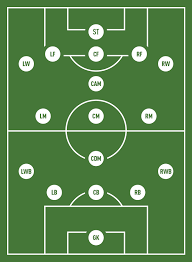

In [201]:
from IPython.display import Image

Image(filename='positions_fifa.png')

# making 4 class
1- striker

2- Mid fielder

3- Defender

4- Goal keeper

In [203]:
def main_positions(position):
    if position == 'GK':
        return 'Goalkeeper'
    elif position in ['CB', 'RB', 'LB', 'RWB', 'LWB']:
        return 'Defender'
    elif position in ['CM', 'CDM', 'CAM', 'RM', 'LM']:
        return 'Mid_Fielder'
    elif position in ['ST', 'CF', 'RF', 'LF', 'RW', 'LW']:
        return 'Striker'
    else:
        return 'Unknown'

df['main_positions'] = df['positions'].apply(lambda x: main_positions(x.split(',')[0]))


In [204]:
posi_df = df.loc[:, ['positions','main_positions']]
posi_df

,positions,main_positions
0,"CF,RW,ST",Striker
1,"CAM,RM,CM",Mid_Fielder
2,"CM,CAM",Mid_Fielder
3,"LW,ST",Striker
4,CB,Defender
...,...,...
17949,"RM,CAM,CM",Mid_Fielder
17950,LB,Defender
17951,GK,Goalkeeper
17952,"ST,LM",Striker


In [205]:
categorical_columns1 = df.select_dtypes(include=['object'])
categorical_columns1

,full_name,positions,nationality,preferred_foot,work_rate,body_type,club_team,club_position,club_join_date,contract_end_year,national_team,national_team_position,main_positions
0,Lionel Andrés Messi Cuccittini,"CF,RW,ST",Argentina,Left,Medium/ Low,Lean,FC Barcelona,RW,2004,2021,Argentina,RF,Striker
1,Christian Dannemann Eriksen,"CAM,RM,CM",Denmark,Right,High/ Medium,Lean,Tottenham Hotspur,LCM,2013,2020,Denmark,CAM,Mid_Fielder
2,Paul Pogba,"CM,CAM",France,Right,High/ Medium,Normal,Manchester United,LCM,2016,2021,France,RDM,Mid_Fielder
3,Lorenzo Insigne,"LW,ST",Italy,Right,High/ Medium,Normal,Napoli,LS,2010,2022,Italy,LW,Striker
4,Kalidou Koulibaly,CB,Senegal,Right,High/ High,Normal,Napoli,LCB,2014,2021,Unknown,Unknown,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,Rory McKenzie,"RM,CAM,CM",Scotland,Right,High/ Medium,Normal,Kilmarnock,SUB,2010,2020,Unknown,Unknown,Mid_Fielder
17950,Michal Sipľak,LB,Slovakia,Left,Medium/ High,Normal,Cracovia,LB,2017,2023,Unknown,Unknown,Defender
17951,Jan Bekkema,GK,Netherlands,Right,Medium/ Medium,Normal,SC Heerenveen,RES,2016,2019,Unknown,Unknown,Goalkeeper
17952,Abdulrahman Al Yami,"ST,LM",Saudi Arabia,Right,Medium/ Low,Lean,Al Hilal,RES,2017,2020,Unknown,Unknown,Striker


In [206]:
categorical_columns1.columns

Index(['full_name', 'positions', 'nationality', 'preferred_foot', 'work_rate',
       'body_type', 'club_team', 'club_position', 'club_join_date',
       'contract_end_year', 'national_team', 'national_team_position',
       'main_positions'],
      dtype='object')

# Remove Object data type columns which we cannot convert in int

In [207]:
categorical_columns1

,full_name,positions,nationality,preferred_foot,work_rate,body_type,club_team,club_position,club_join_date,contract_end_year,national_team,national_team_position,main_positions
0,Lionel Andrés Messi Cuccittini,"CF,RW,ST",Argentina,Left,Medium/ Low,Lean,FC Barcelona,RW,2004,2021,Argentina,RF,Striker
1,Christian Dannemann Eriksen,"CAM,RM,CM",Denmark,Right,High/ Medium,Lean,Tottenham Hotspur,LCM,2013,2020,Denmark,CAM,Mid_Fielder
2,Paul Pogba,"CM,CAM",France,Right,High/ Medium,Normal,Manchester United,LCM,2016,2021,France,RDM,Mid_Fielder
3,Lorenzo Insigne,"LW,ST",Italy,Right,High/ Medium,Normal,Napoli,LS,2010,2022,Italy,LW,Striker
4,Kalidou Koulibaly,CB,Senegal,Right,High/ High,Normal,Napoli,LCB,2014,2021,Unknown,Unknown,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,Rory McKenzie,"RM,CAM,CM",Scotland,Right,High/ Medium,Normal,Kilmarnock,SUB,2010,2020,Unknown,Unknown,Mid_Fielder
17950,Michal Sipľak,LB,Slovakia,Left,Medium/ High,Normal,Cracovia,LB,2017,2023,Unknown,Unknown,Defender
17951,Jan Bekkema,GK,Netherlands,Right,Medium/ Medium,Normal,SC Heerenveen,RES,2016,2019,Unknown,Unknown,Goalkeeper
17952,Abdulrahman Al Yami,"ST,LM",Saudi Arabia,Right,Medium/ Low,Lean,Al Hilal,RES,2017,2020,Unknown,Unknown,Striker


In [208]:
for column in categorical_columns1.columns:
    print(f"Value counts for {column}:")
    print(categorical_columns1[column].value_counts())
    print()

Value counts for full_name:
Adama Traoré                        3
Scott Brown                         3
Liam Kelly                          3
Kevin Salazar                       2
Maximilian Bauer                    2
                                   ..
Lewis Hardcastle                    1
Karol Szymański                     1
Berkay Yıldız                       1
Brayan Damián Lucumí Lucumí         1
José Francisco dos Santos Júnior    1
Name: full_name, Length: 17898, dtype: int64

Value counts for positions:
CB              2243
GK              2065
ST              1747
CM               764
CDM,CM           709
                ... 
LB,LM,CB           1
CF,CM,ST           1
CB,ST              1
RB,ST              1
CAM,CM,RW,RM       1
Name: positions, Length: 890, dtype: int64

Value counts for nationality:
England                 1658
Germany                 1199
Spain                   1070
France                   925
Argentina                904
                        ... 
P

In [209]:
selected_columns = []

for column in categorical_columns1.columns:
    unique_values = categorical_columns1[column].unique()
    if len(unique_values) < 20:
        selected_columns.append(column)
        print(f"Value counts for {column}:")
        print(categorical_columns1[column].value_counts())
        print()

# Print the selected columns
print("Selected columns with unique value length less than 10:")
print(selected_columns)

Value counts for preferred_foot:
Right    13781
Left      4173
Name: preferred_foot, dtype: int64

Value counts for work_rate:
Medium/ Medium    9690
High/ Medium      3093
Medium/ High      1681
High/ High         934
Medium/ Low        905
High/ Low          673
Low/ Medium        522
Low/ High          422
Low/ Low            34
Name: work_rate, dtype: int64

Value counts for body_type:
Normal    10397
Lean       6471
Stocky     1086
Name: body_type, dtype: int64

Value counts for main_positions:
Mid_Fielder    6668
Defender       5883
Striker        3338
Goalkeeper     2065
Name: main_positions, dtype: int64

Selected columns with unique value length less than 10:
['preferred_foot', 'work_rate', 'body_type', 'main_positions']


In [210]:
selected_columns = []

for column in categorical_columns1.columns:
    unique_values = categorical_columns1[column].unique()
    if len(unique_values) > 20:
        selected_columns.append(column)
        print(f"Value counts for {column}:")
        print(categorical_columns1[column].value_counts())
        print()

# Print the selected columns
print("Selected columns with unique value length less than 10:")
print(selected_columns)

Value counts for full_name:
Adama Traoré                        3
Scott Brown                         3
Liam Kelly                          3
Kevin Salazar                       2
Maximilian Bauer                    2
                                   ..
Lewis Hardcastle                    1
Karol Szymański                     1
Berkay Yıldız                       1
Brayan Damián Lucumí Lucumí         1
José Francisco dos Santos Júnior    1
Name: full_name, Length: 17898, dtype: int64

Value counts for positions:
CB              2243
GK              2065
ST              1747
CM               764
CDM,CM           709
                ... 
LB,LM,CB           1
CF,CM,ST           1
CB,ST              1
RB,ST              1
CAM,CM,RW,RM       1
Name: positions, Length: 890, dtype: int64

Value counts for nationality:
England                 1658
Germany                 1199
Spain                   1070
France                   925
Argentina                904
                        ... 
P

In [211]:
selected_columns

['full_name',
 'positions',
 'nationality',
 'club_team',
 'club_position',
 'club_join_date',
 'contract_end_year',
 'national_team',
 'national_team_position']

In [212]:
df.drop(selected_columns, axis=1, inplace=True)


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   overall_rating                 17954 non-null  int64  
 4   potential                      17954 non-null  int64  
 5   value_euro                     17954 non-null  float64
 6   wage_euro                      17954 non-null  float64
 7   preferred_foot                 17954 non-null  object 
 8   international_reputation(1-5)  17954 non-null  int64  
 9   weak_foot(1-5)                 17954 non-null  int64  
 10  skill_moves(1-5)               17954 non-null  int64  
 11  work_rate                      17954 non-null  object 
 12  body_type                      17954 non-null 

# Lets do label encoding object columns

In [215]:
['preferred_foot', 'work_rate', 'body_type','main_positions']


['preferred_foot', 'work_rate', 'body_type', 'main_positions']

In [216]:
#preferred_foot
print(df["preferred_foot"].value_counts())
print()
print(df["preferred_foot"].nunique())

Right    13781
Left      4173
Name: preferred_foot, dtype: int64

2


In [217]:
from sklearn import preprocessing


In [218]:
le_pf = preprocessing.LabelEncoder()
le_pf.fit(['Right', 'Left'])
df['preferred_foot'] = le_pf.transform(df['preferred_foot'])

In [219]:
#work_rate
print(df["work_rate"].value_counts())
print()
print(df["work_rate"].nunique())

Medium/ Medium    9690
High/ Medium      3093
Medium/ High      1681
High/ High         934
Medium/ Low        905
High/ Low          673
Low/ Medium        522
Low/ High          422
Low/ Low            34
Name: work_rate, dtype: int64

9


In [220]:
le_wr = preprocessing.LabelEncoder()
le_wr.fit(['Medium/ Medium', 'High/ Medium', 'Medium/ High', 'High/ High', 'Medium/ Low', 'High/ Low', 'Low/ Medium', 'Low/ High','Low/ Low'])
df['work_rate'] = le_wr.transform(df['work_rate'])

In [221]:
#body_type
print(df["body_type"].value_counts())
print()
print(df["body_type"].nunique())

Normal    10397
Lean       6471
Stocky     1086
Name: body_type, dtype: int64

3


In [222]:
le_bt = preprocessing.LabelEncoder()
le_bt.fit(['Normal', 'Lean','Stocky'])
df['body_type'] = le_bt.transform(df['body_type'])

In [223]:
#main_positions
print(df["main_positions"].value_counts())
print()
print(df["main_positions"].nunique())

Mid_Fielder    6668
Defender       5883
Striker        3338
Goalkeeper     2065
Name: main_positions, dtype: int64

4


In [224]:
le_mp = preprocessing.LabelEncoder()
le_mp.fit(['Mid_Fielder', 'Defender','Striker','Goalkeeper'])
df['main_positions'] = le_mp.transform(df['main_positions'])

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   overall_rating                 17954 non-null  int64  
 4   potential                      17954 non-null  int64  
 5   value_euro                     17954 non-null  float64
 6   wage_euro                      17954 non-null  float64
 7   preferred_foot                 17954 non-null  int32  
 8   international_reputation(1-5)  17954 non-null  int64  
 9   weak_foot(1-5)                 17954 non-null  int64  
 10  skill_moves(1-5)               17954 non-null  int64  
 11  work_rate                      17954 non-null  int32  
 12  body_type                      17954 non-null 

In [226]:
df.select_dtypes(include=['object']).shape[1]

0

In [227]:
df.columns

Index(['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'work_rate', 'body_type', 'release_clause_euro', 'club_rating',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning',
       'GK_reflexes', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM',
       'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM',
       'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'main_p

# Apply the correlation and remove the column which are more than 60% correlated

In [228]:
cdf = df.copy()

In [229]:
cdf.columns

Index(['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'work_rate', 'body_type', 'release_clause_euro', 'club_rating',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning',
       'GK_reflexes', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM',
       'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM',
       'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'main_p

In [230]:
corr_matrix = cdf.corr()

In [231]:
corr_matrix

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,main_positions
age,1.000000,0.059579,0.233819,0.461529,-0.259579,0.079954,0.149324,0.002259,0.259977,0.061108,...,0.098114,0.098114,0.098114,0.062369,0.064458,0.103794,0.103794,0.103794,0.064458,-0.074695
height_cm,0.059579,1.000000,0.495320,0.038080,0.008526,0.010781,0.020643,0.050176,0.026850,-0.130464,...,-0.246577,-0.246577,-0.246577,-0.292732,-0.267152,-0.178875,-0.178875,-0.178875,-0.267152,-0.167951
weight_kgs,0.233819,0.495320,1.000000,0.150521,-0.015099,0.043830,0.061101,0.072883,0.085086,-0.128875,...,-0.237121,-0.237121,-0.237121,-0.299433,-0.269419,-0.150195,-0.150195,-0.150195,-0.269419,-0.186523
overall_rating,0.461529,0.038080,0.150521,1.000000,0.647249,0.626645,0.572836,-0.047754,0.489416,0.216394,...,0.340379,0.340379,0.340379,0.322630,0.309870,0.299307,0.299307,0.299307,0.309870,0.026297
potential,-0.259579,0.008526,-0.015099,0.647249,1.000000,0.573036,0.481828,-0.040815,0.358874,0.167735,...,0.222506,0.222506,0.222506,0.223419,0.211580,0.181563,0.181563,0.181563,0.211580,0.078012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LCB,0.103794,-0.178875,-0.150195,0.299307,0.181563,0.154180,0.161579,-0.113982,0.118512,0.179756,...,0.981359,0.981359,0.981359,0.961219,0.978808,1.000000,1.000000,1.000000,0.978808,-0.208142
CB,0.103794,-0.178875,-0.150195,0.299307,0.181563,0.154180,0.161579,-0.113982,0.118512,0.179756,...,0.981359,0.981359,0.981359,0.961219,0.978808,1.000000,1.000000,1.000000,0.978808,-0.208142
RCB,0.103794,-0.178875,-0.150195,0.299307,0.181563,0.154180,0.161579,-0.113982,0.118512,0.179756,...,0.981359,0.981359,0.981359,0.961219,0.978808,1.000000,1.000000,1.000000,0.978808,-0.208142
RB,0.064458,-0.267152,-0.269419,0.309870,0.211580,0.178085,0.175706,-0.138867,0.120949,0.228848,...,0.993511,0.993511,0.993511,0.996444,1.000000,0.978808,0.978808,0.978808,1.000000,-0.108770


<AxesSubplot:>

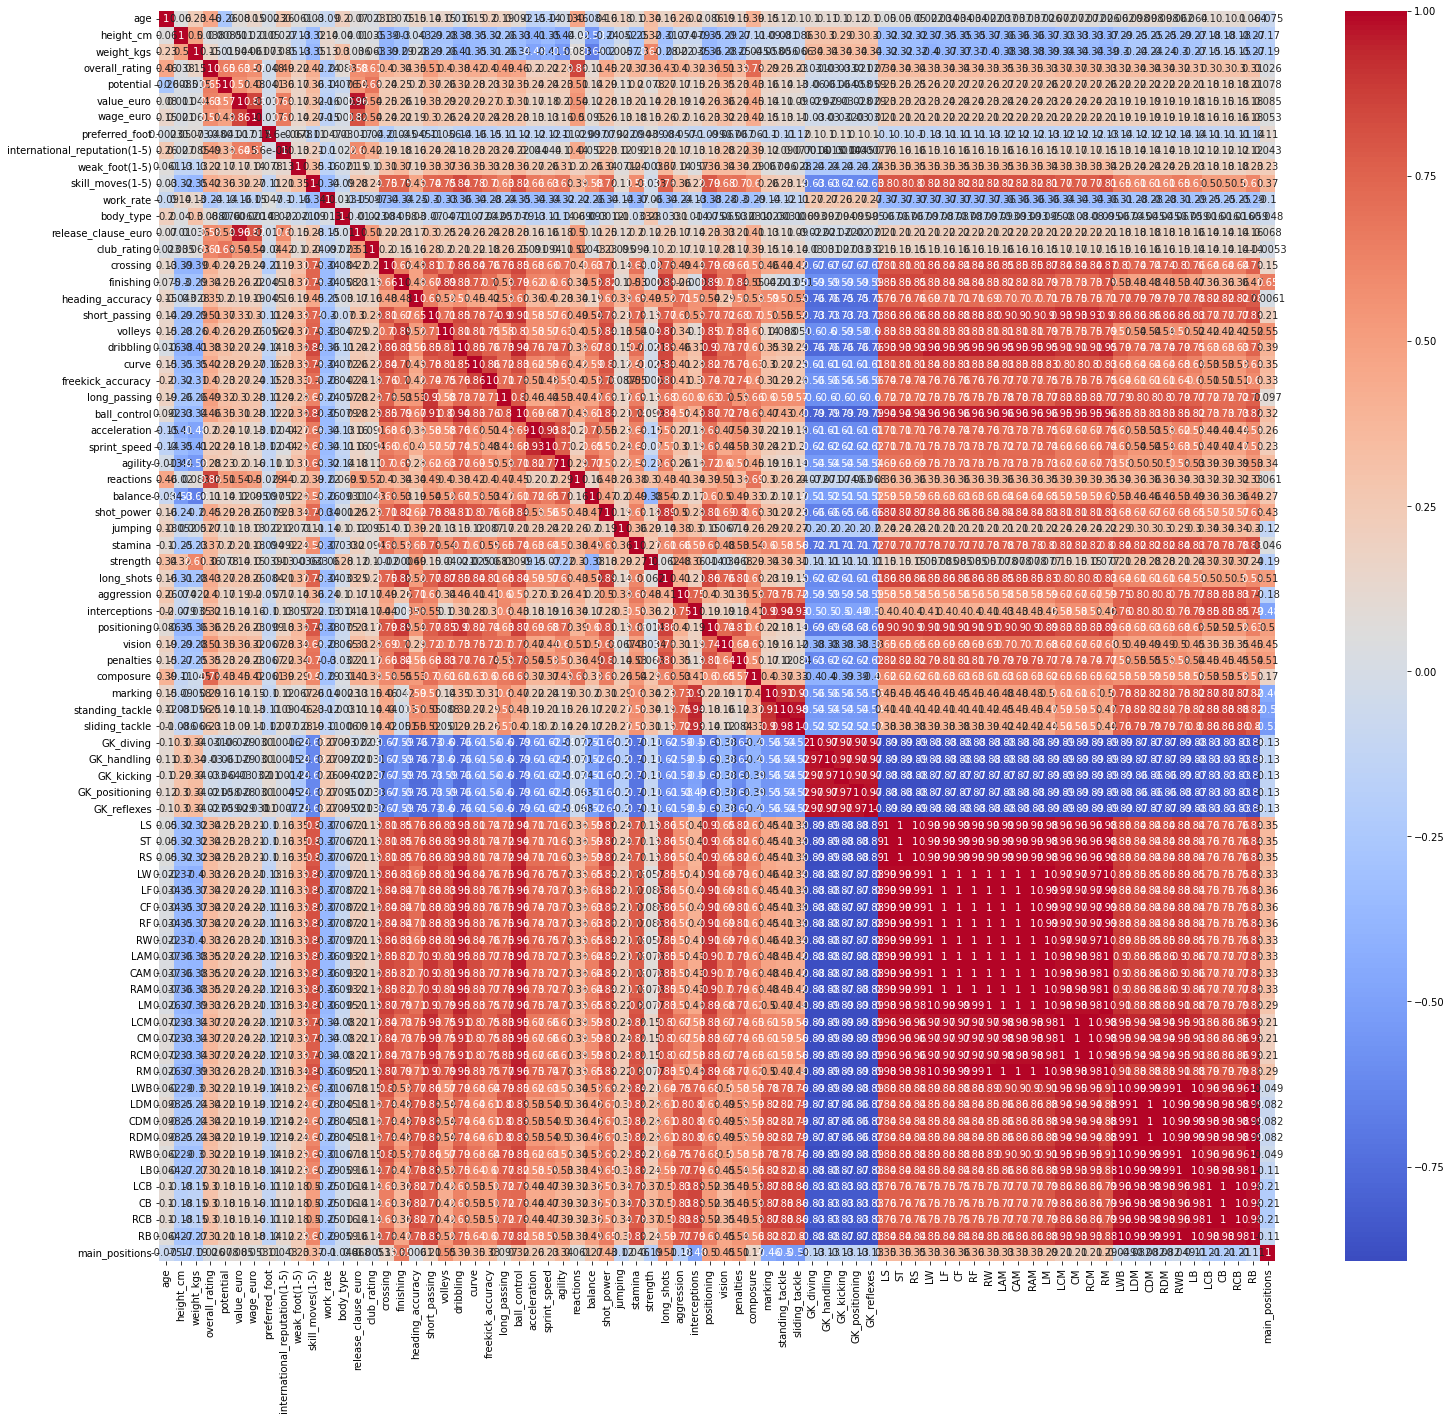

In [233]:
plt.figure(figsize=(25, 23))

sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

In [234]:
threshold = 0.6
column_names = set()
for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > threshold:
            print(corr_matrix.iloc[row][col])
            print(corr_matrix.columns[row])
            column_names.add(corr_matrix.columns[row])

0.6472492396959479
potential
0.6266453122102479
value_euro
0.8564967445761087
wage_euro
0.6413675448047093
international_reputation(1-5)
0.6657070353793811
international_reputation(1-5)
0.9641889701291062
release_clause_euro
0.815114621608622
release_clause_euro
0.600596528974701
release_clause_euro
0.6119365218982944
club_rating
0.6794387441405323
club_rating
0.7464664003511047
crossing
0.7484922900975466
finishing
0.6641825951455494
finishing
0.7355436396634722
short_passing
0.812404450208049
short_passing
0.6718369583934244
short_passing
0.6536214138990123
short_passing
0.7492295834896452
volleys
0.6965110230042353
volleys
0.8864689170812116
volleys
0.7050007291955909
volleys
0.84182734083099
dribbling
0.8609118638514924
dribbling
0.8277433089925811
dribbling
0.8492648917999117
dribbling
0.8121116741214758
dribbling
0.7756658227975481
curve
0.83778599442169
curve
0.7656688765932053
curve
0.7794679682581339
curve
0.8107720905520008
curve
0.8461356876324607
curve
0.7048324231141543
fr

In [235]:
column_names

{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK_diving',
 'GK_handling',
 'GK_kicking',
 'GK_positioning',
 'GK_reflexes',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST',
 'acceleration',
 'aggression',
 'agility',
 'balance',
 'ball_control',
 'club_rating',
 'composure',
 'crossing',
 'curve',
 'dribbling',
 'finishing',
 'freekick_accuracy',
 'interceptions',
 'international_reputation(1-5)',
 'long_passing',
 'long_shots',
 'main_positions',
 'marking',
 'penalties',
 'positioning',
 'potential',
 'reactions',
 'release_clause_euro',
 'short_passing',
 'shot_power',
 'sliding_tackle',
 'sprint_speed',
 'stamina',
 'standing_tackle',
 'strength',
 'value_euro',
 'vision',
 'volleys',
 'wage_euro'}

In [236]:
df = df.drop(column_names, axis=1)
df

,age,height_cm,weight_kgs,overall_rating,preferred_foot,weak_foot(1-5),skill_moves(1-5),work_rate,body_type,heading_accuracy,jumping
0,31,170.18,72.1,94,0,4,4,7,0,70,68
1,27,154.94,76.2,88,1,5,4,2,0,52,50
2,25,190.50,83.9,88,1,4,5,2,1,75,83
3,27,162.56,59.0,88,1,4,4,2,1,56,53
4,27,187.96,88.9,88,1,3,2,0,1,83,81
...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,67,1,3,3,2,1,60,77
17950,23,182.88,79.8,59,0,3,2,6,1,53,74
17951,22,185.42,89.8,59,1,1,1,8,1,13,43
17952,21,175.26,64.9,59,1,4,3,7,0,55,58


# Apply the variance and remove the columns whose variance is less that 20%

In [237]:
from sklearn.feature_selection import VarianceThreshold

In [238]:
cdf1 = df.copy()

In [239]:
varT = VarianceThreshold(threshold=0.20) 

In [240]:
op = varT.fit(cdf1)

In [241]:
op.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [242]:
rem_col = cdf1.columns[op.get_support() == False]

In [243]:
df = df.drop(rem_col, axis=1)
df

,age,height_cm,weight_kgs,overall_rating,weak_foot(1-5),skill_moves(1-5),work_rate,body_type,heading_accuracy,jumping
0,31,170.18,72.1,94,4,4,7,0,70,68
1,27,154.94,76.2,88,5,4,2,0,52,50
2,25,190.50,83.9,88,4,5,2,1,75,83
3,27,162.56,59.0,88,4,4,2,1,56,53
4,27,187.96,88.9,88,3,2,0,1,83,81
...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,67,3,3,2,1,60,77
17950,23,182.88,79.8,59,3,2,6,1,53,74
17951,22,185.42,89.8,59,1,1,8,1,13,43
17952,21,175.26,64.9,59,4,3,7,0,55,58


# Understand the Dataset whether the dataset is corr

In [245]:
corr_matrix = df.corr()

In [246]:
corr_matrix

,age,height_cm,weight_kgs,overall_rating,weak_foot(1-5),skill_moves(1-5),work_rate,body_type,heading_accuracy,jumping
age,1.000000,0.059579,0.233819,0.461529,0.061108,0.029681,-0.090472,0.203632,0.151723,0.183816
height_cm,0.059579,1.000000,0.495320,0.038080,-0.130464,-0.320141,0.139972,0.039831,-0.043058,-0.052169
weight_kgs,0.233819,0.495320,1.000000,0.150521,-0.128875,-0.353601,0.129429,0.302726,0.027698,0.005741
overall_rating,0.461529,0.038080,0.150521,1.000000,0.216394,0.418718,-0.239725,0.088362,0.347670,0.271008
weak_foot(1-5),0.061108,-0.130464,-0.128875,0.216394,1.000000,0.345284,-0.156814,-0.021071,0.192346,0.071491
skill_moves(1-5),0.029681,-0.320141,-0.353601,0.418718,0.345284,1.000000,-0.344247,-0.090429,0.454783,0.109956
work_rate,-0.090472,0.139972,0.129429,-0.239725,-0.156814,-0.344247,1.000000,0.013030,-0.250959,-0.142484
body_type,0.203632,0.039831,0.302726,0.088362,-0.021071,-0.090429,0.013030,1.000000,0.029569,0.102372
heading_accuracy,0.151723,-0.043058,0.027698,0.347670,0.192346,0.454783,-0.250959,0.029569,1.000000,0.390033
jumping,0.183816,-0.052169,0.005741,0.271008,0.071491,0.109956,-0.142484,0.102372,0.390033,1.000000


<AxesSubplot:>

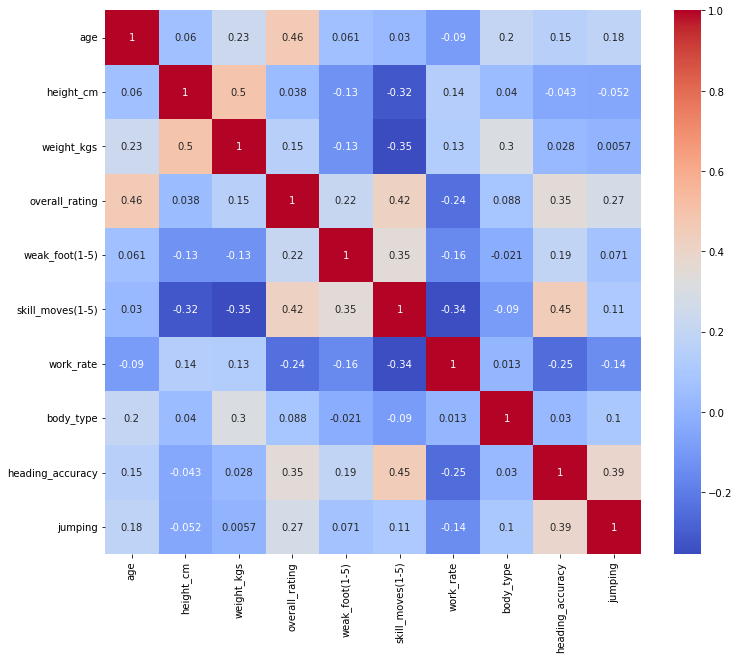

In [247]:
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

In [248]:
# Plotting Data to understand it better

In [249]:
import matplotlib.pyplot as plt

def create_pie_chart(column):
    value_counts = df[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    total_count = sum(sizes)

    threshold = total_count * 0.02
    
    others_mask = sizes < threshold

    others_count = sum(sizes[others_mask])

    new_labels = list(labels[~others_mask])
    new_sizes = list(sizes[~others_mask])
    new_labels.append('Others')
    new_sizes.append(others_count)

    plt.figure(figsize=(12, 12))
    plt.pie(new_sizes, labels=new_labels, autopct='%1.1f%%')
    plt.title(column)
    plt.show()


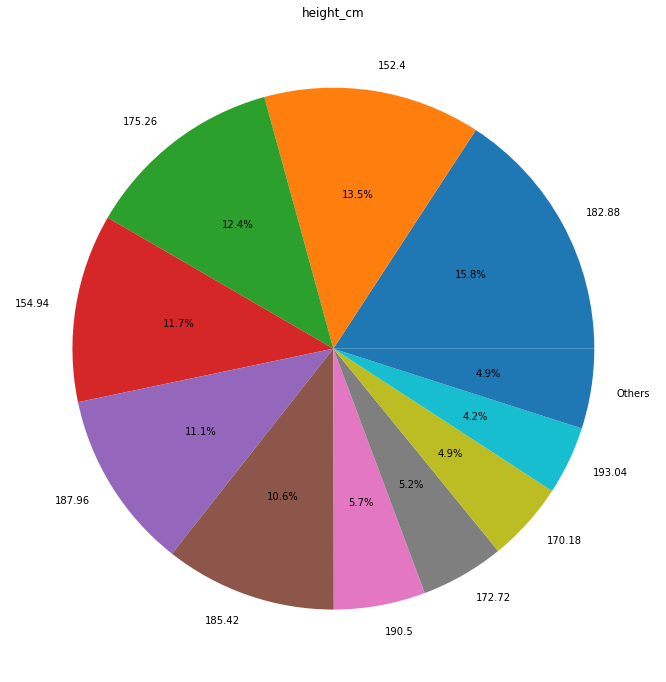

In [250]:
create_pie_chart('height_cm')


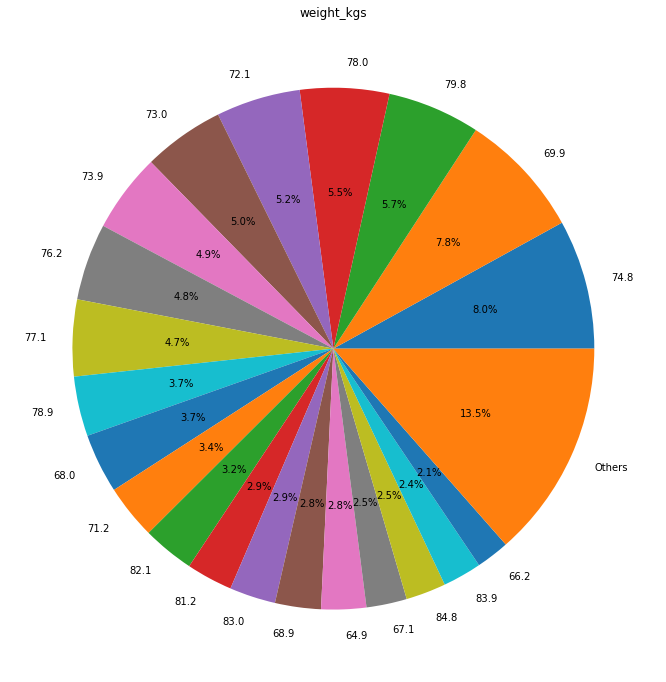

In [252]:
create_pie_chart('weight_kgs')


# height_cm and weight_kgs is slightly correlated 

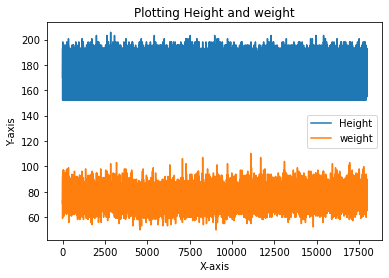

In [253]:
fig, ax = plt.subplots()

# Plot col1
ax.plot(df['height_cm'], label='Height')

# Plot col2
ax.plot(df['weight_kgs'], label='weight')

# Set the labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plotting Height and weight')

# Display the legend
ax.legend()

# Show the plot
plt.show()